In [1]:
from classes import *
from helpers import *
from shape_functions import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib widget

## prev

### test shape functions 1d -- away from interface

In [19]:
h = 1/10
xdom = np.linspace(-2*h+1e-10,2*h-1e-10,1005)[1:]
ydom = np.linspace(-2*h,2*h,1005)[1:]

In [20]:
x0max = 15
domain = np.linspace(-2*h,h*x0max+2*h)

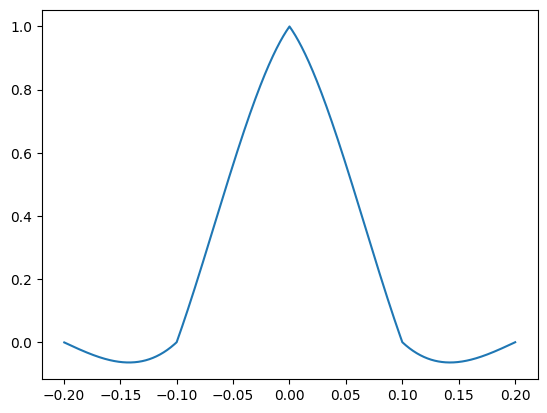

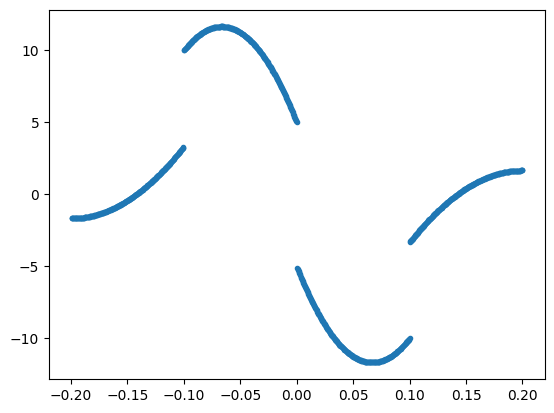

In [21]:
plt.plot(xdom,[phi3(x,h) for x in xdom])
plt.show()

plt.plot(xdom,[phi3_dx(x,h) for x in xdom],'.')
plt.show()

### test 1d shape functions -- near interface

In [22]:
h = 1
xdom = np.linspace(-2*h,2*h,1005)[1:]
ydom = np.linspace(-2*h,2*h,1005)[1:]

x0max = 15
domain = np.linspace(h,x0max-2*h)

In [23]:

line = [[h],[0]]
data = []
for s in np.linspace(0,1,101):
    blocks = []
    for x0_ in range(x0max):
        x0 = x0_*h
        coll = 1-x0_%2
        blocks.append((xdom+x0,[phi3_interface(x,h,s,coll) for x in xdom]))
        line[0].append(x0+2*h)
        line[1].append(0)
    data.append(blocks)
line[0].append(x0max*h-2*h)
line[1].append(0)
ani = animate_2d([line],data,x0max,figsize=(8,3),yesdot=False)

line = [[h],[0]]
data = []
for s in np.linspace(0,1,101):
    blocks = []
    for x0_ in range(x0max):
        x0 = x0_*h
        coll = 1-x0_%2
        blocks.append((xdom+x0,[phi3_interface_dy(x,h,s,coll) for x in xdom]))
        line[0].append(x0+2*h)
        line[1].append(0)
    data.append(blocks)
line[0].append(x0max*h-2*h)
line[1].append(0)
ani_dy = animate_2d([line],data,x0max,figsize=(8,3),yesdot=False)

In [24]:
ani

In [25]:
ani_dy

In [26]:

frames = []
data = []
for s in np.linspace(0,1,101):
    blocks = []
    pou = np.zeros_like(domain)
    for x0_ in range(x0max):
        x0 = x0_*h
        coll = 1-x0_%2
        blocks.append((xdom+x0,[phi3_interface_eval(x+x0,h,x0,s) for x in xdom]))
        pou += np.array([phi3_interface_eval(x,h,x0,s) for x in domain])
    data.append(blocks)
    frames.append([domain,pou])
ani_pou = animate_2d(frames,data,x0max,figsize=(8,3),yesdot=False)


In [27]:
ani_pou

### test 2d shape functions -- away from interface

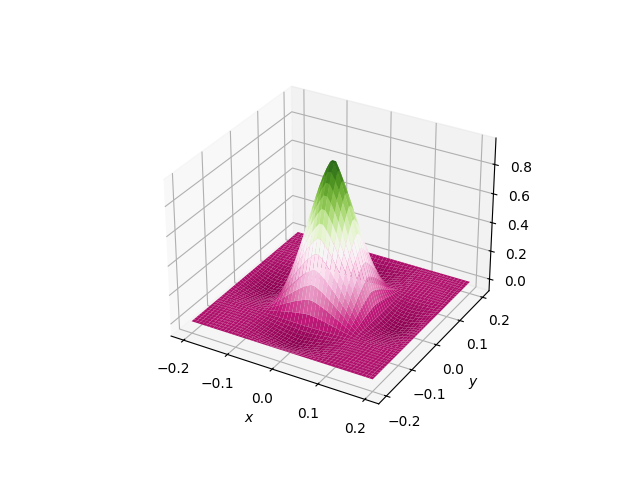

In [3]:
h = 1/10
func = lambda x,y: phi3_2d(x,y,h)
a = [-2*h,-2*h]
b = [2*h,2*h]
vis_3d([func],[a],[b])

In [29]:
h = 1/10
func = lambda x,y: phi3_2d_eval(x,y,h,2,3)
a = [2-2*h,3-2*h]
b = [2+2*h,3+2*h]
vis_3d_rotate([[[func],[a],[b]]])

In [30]:
h = 1/10
l_func,l_a,l_b = [], [], []
for x0_ in range(4):
    for y0_ in range(4):
        x0,y0 = x0_*h,y0_*h
        func = lambda x,y,x0=x0,y0=y0: phi3_2d_eval(x,y,h,x0,y0)
        a = [x0-2*h,y0-2*h]
        b = [x0+2*h,y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d_rotate([[l_func,l_a,l_b]])

### test 2d shape functions near interface

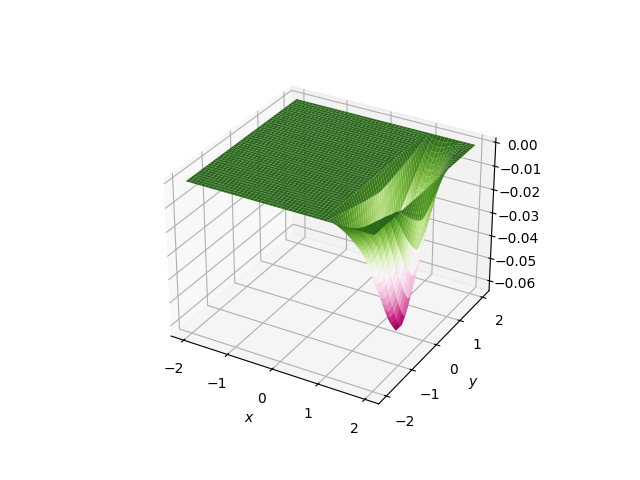

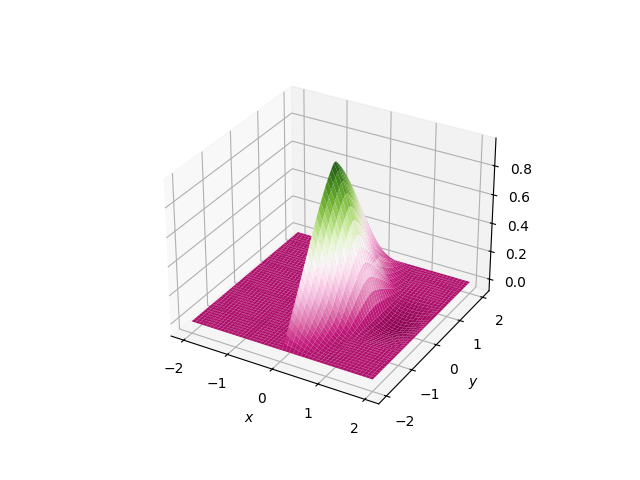

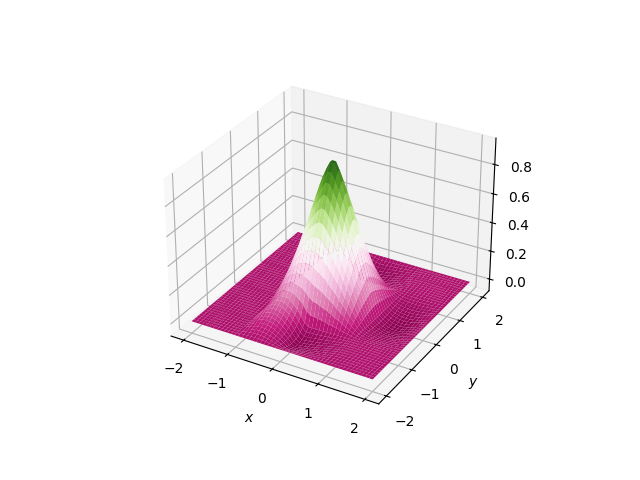

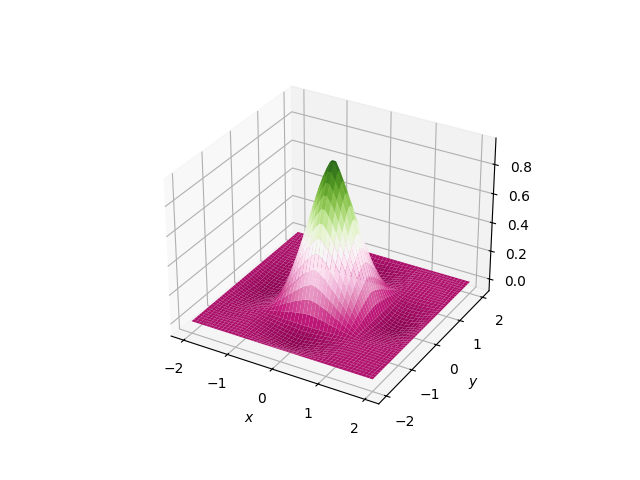

In [7]:
h = 1
shifts = [-1,0,1,2]
for shift in shifts:
    def func(x,y):
        if x < -shift*h:
            return 0
        else:
            scale = min(x/h + shift, 1)
            return phi3_2d(x,y,h,scale,True,coll=True)
    a = [-2*h,-2*h]
    b = [2*h,2*h]
    vis_3d([func],[a],[b])

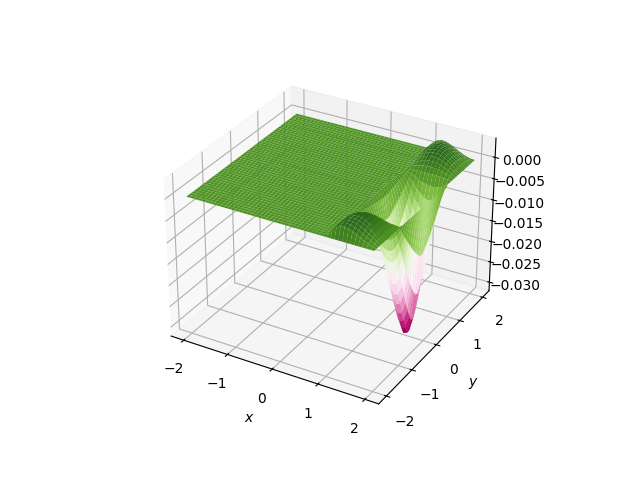

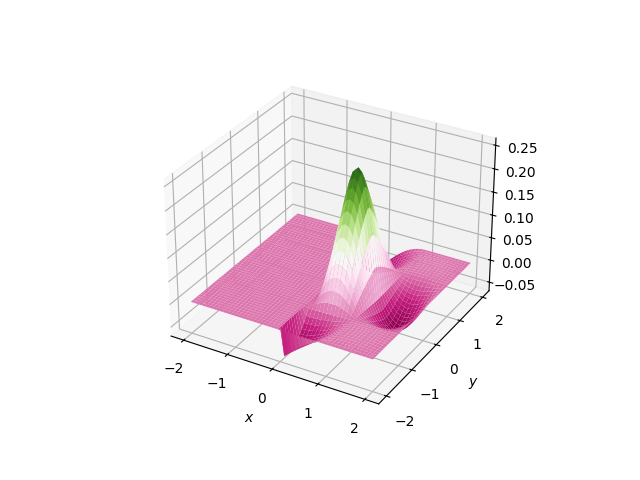

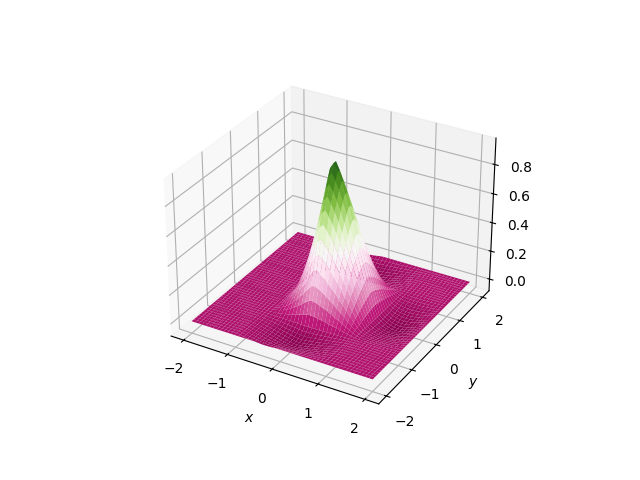

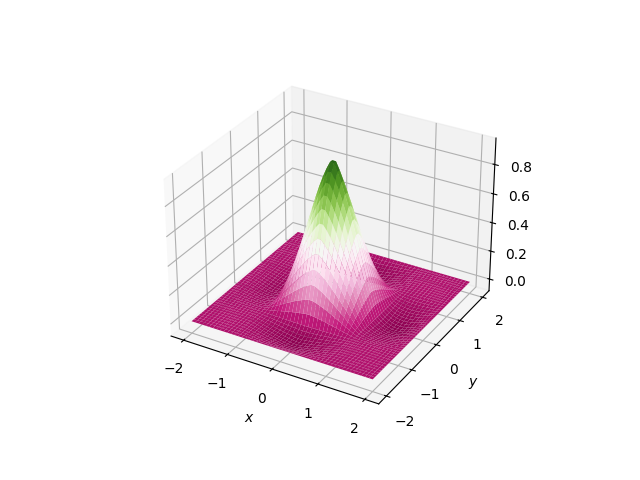

In [9]:
h = 1
shifts = [-1,0,1,2]
for shift in shifts:
    def func(x,y):
        if x < -shift*h:
            return 0
        else:
            scale = min(x/h + shift, 1)
            return phi3_2d(x,y,h,scale,True,coll=False)
    a = [-2*h,-2*h]
    b = [2*h,2*h]
    vis_3d([func],[a],[b])

In [33]:
h = 1
s = .5
func = lambda x,y: phi3_2d(x,y,h,0,True,coll=False)
a = [-2*h,-2*h]
b = [2*h,2*h]
vis_3d_rotate([[[func],[a],[b]]])

In [10]:
h = 1/10
l_func,l_a,l_b = [], [], []
for x0_ in range(6):
    for y0_ in range(4):
        x0,y0 = .5-2*h+x0_*h,y0_*h
        func = lambda x,y,x0=x0,y0=y0: phi3_2d_eval(x,y,h,x0,y0)
        a = [max(.5+1e-10,x0-2*h),y0-2*h]
        b = [min(.5+h-1e-10,x0+2*h),y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d_rotate([[l_func,l_a,l_b]])
# vis_3d(l_func,l_a,l_b)

In [11]:
h = 1/10
l_func,l_a,l_b = [], [], []
for x0_ in range(6):
    for y0_ in range(4):
        x0,y0 = .5-2*h+x0_*h,y0_*h
        func = lambda x,y,x0=x0,y0=y0: grad_phi3_eval(x,y,h,x0,y0)[0]
        a = [max(.5+1e-10,x0-2*h),y0-2*h]
        b = [min(.5+h-1e-10,x0+2*h),y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d_rotate([[l_func,l_a,l_b]])
# vis_3d(l_func,l_a,l_b)

In [12]:
h = 1/10
l_func,l_a,l_b = [], [], []
for x0_ in range(6):
    for y0_ in range(4):
        x0,y0 = .5-2*h+x0_*h,y0_*h
        func = lambda x,y,x0=x0,y0=y0: grad_phi3_eval(x,y,h,x0,y0)[1]
        a = [max(.5+1e-10,x0-2*h),y0-2*h]
        b = [min(.5+h-1e-10,x0+2*h),y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d_rotate([[l_func,l_a,l_b]])
# vis_3d(l_func,l_a,l_b)

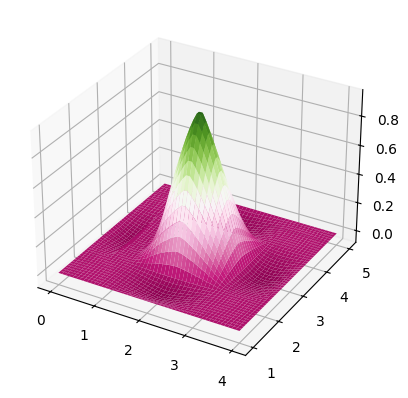

In [11]:
h = 1
func = lambda x,y: phi3_2d_eval(x,y,h,2,3)
a = [2-2*h,3-2*h]
b = [2+2*h,3+2*h]
vis_3d([func],[a],[b])

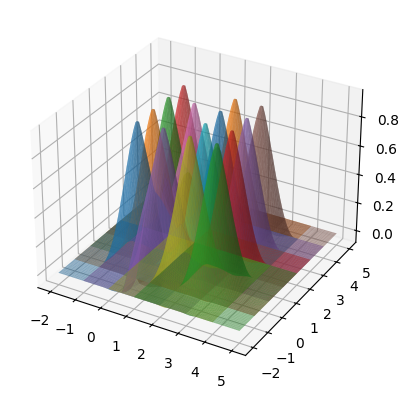

In [34]:
h = 1
l_func,l_a,l_b = [], [], []
for x0 in range(4):
    for y0 in range(4):
        func = lambda x,y,x0=x0,y0=y0: phi3_2d_eval(x,y,h,x0,y0)
        a = [x0-2*h,y0-2*h]
        b = [x0+2*h,y0+2*h]
        l_func.append(func)
        l_a.append(a)
        l_b.append(b)
vis_3d(l_func,l_a,l_b)

### test quadrature

In [2]:
from scipy.integrate import dblquad

In [16]:
def test_quad(f,a,b,c,d,qpn=5):
    func_rev = lambda y,x: f(x,y)
    scipy_val = dblquad(func_rev,a,b,c,d)[0]
    my_val = gauss(f,a,b,c,d,qpn)
    print(scipy_val,my_val,abs(scipy_val-my_val))

In [17]:
func = lambda x,y: np.sin(x)*np.exp(y)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,15)

-220091.86174086106 -220091.86174086184 7.8580342233181e-10


In [18]:
func = lambda x,y: np.sin(x)+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97184.398697734 97184.39869773398 1.4551915228366852e-11


In [19]:
func = lambda x,y: np.sin(x)*np.cos(y)+5*x*gm*3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,8)

97199.57051647456 97199.57051646586 8.702045306563377e-09


In [23]:
func = lambda x,y: x**6*y+5*x**3*y
a,b,c,d = 3,6,4,12
test_quad(func,a,b,c,d,5)

2636619.428571429 2636619.42857143 9.313225746154785e-10


### test constraints

## current spot

In [3]:
N = 8
u = lambda x,y: 1.
f = lambda x,y: 0.
mass = Projection(N,u)

In [4]:
x = mass.solve()

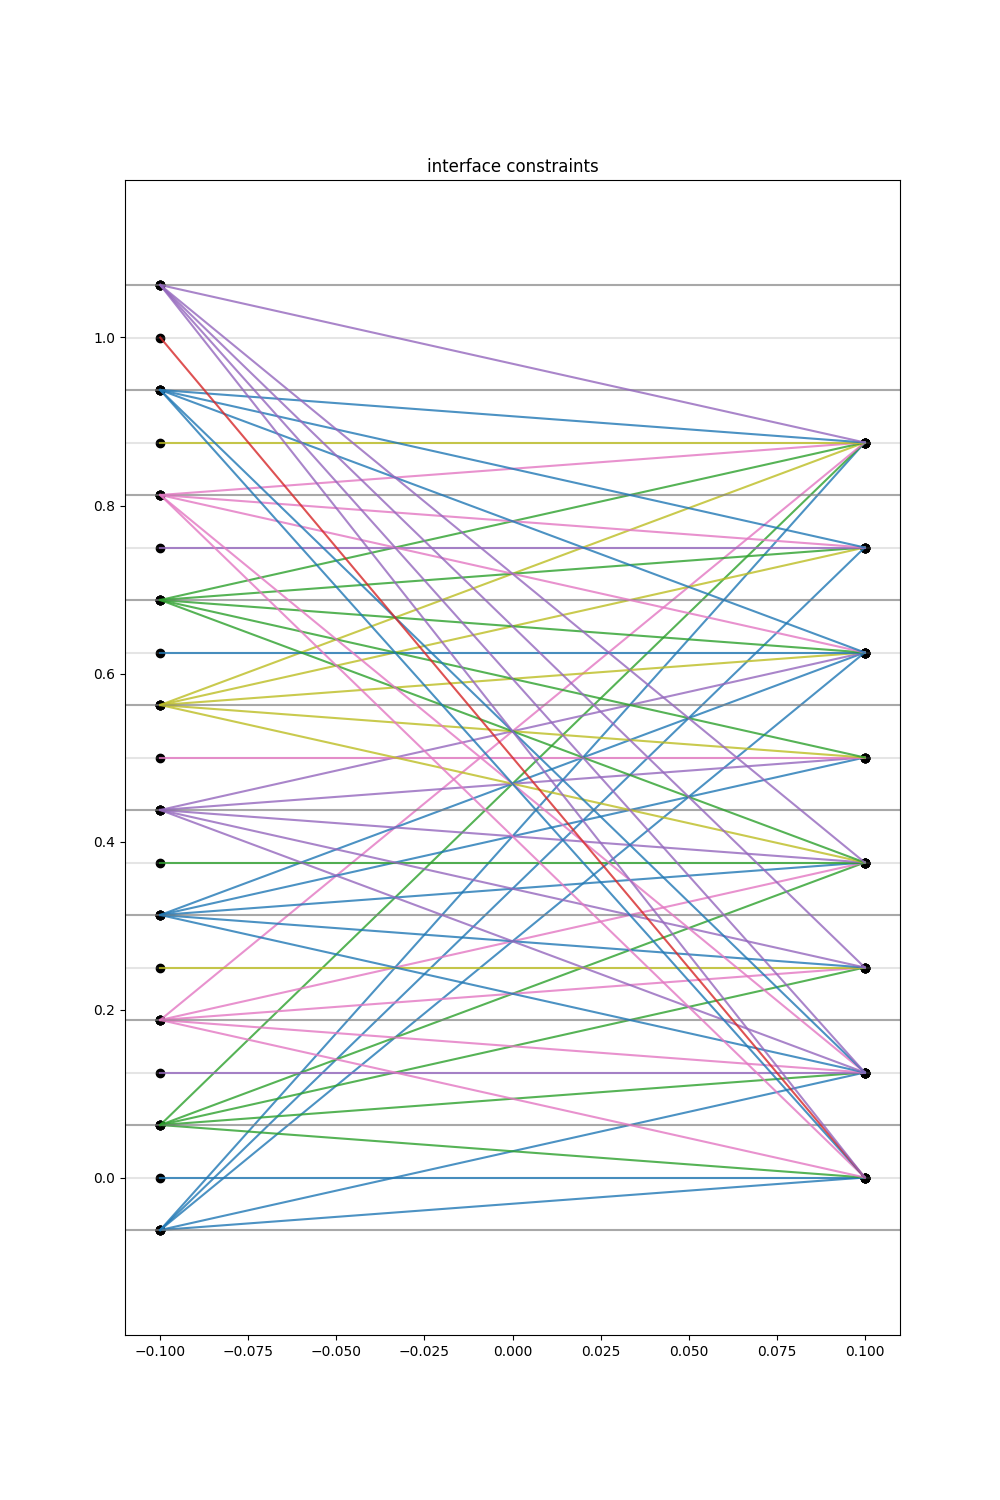

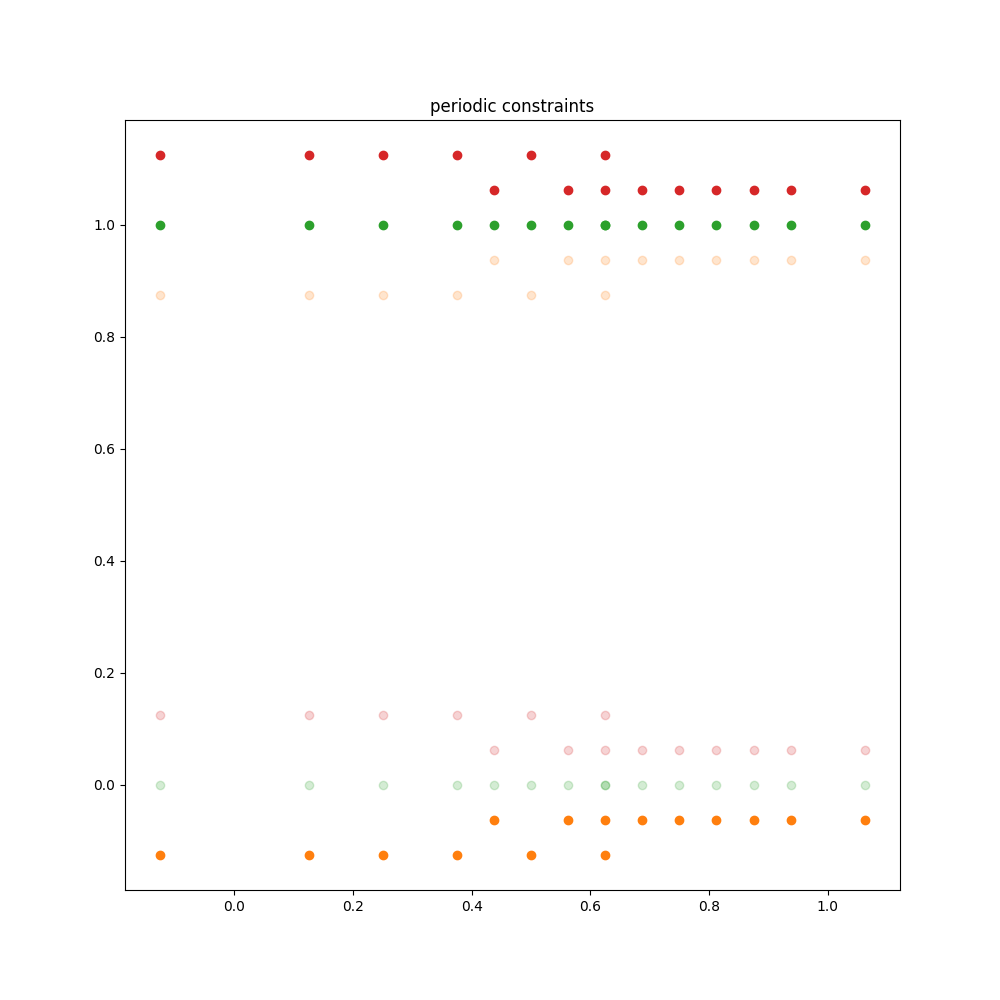

In [5]:
mass.vis_constraints()

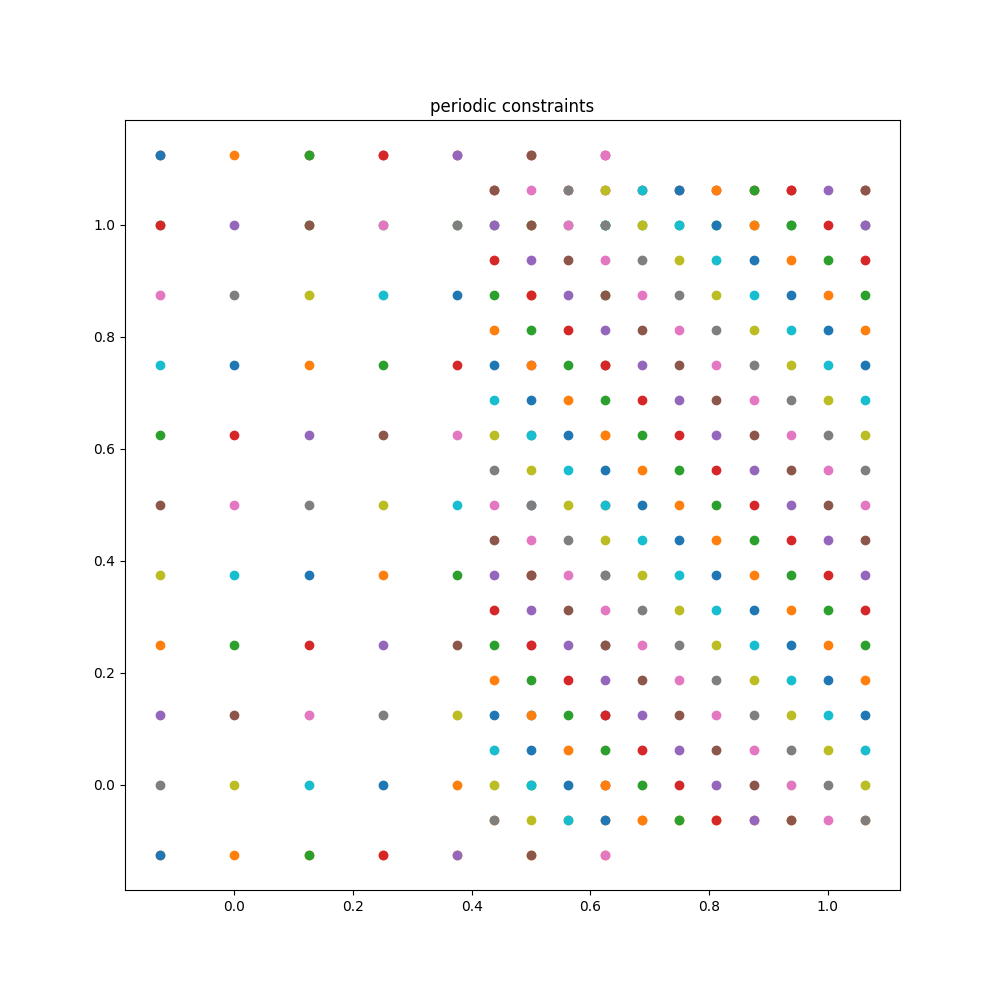

In [6]:
mass.vis_mesh()

In [7]:
s = mass.sol()

In [8]:
dom = np.linspace(0,1)
vals = []
for x in dom:
    for y in dom:
        c = s(x,y)
        vals.append(c)
#         plt.scatter(x,y,c=c)
# plt.colorbar()
# plt.show()

In [9]:
max(vals),min(vals)

(1.481029292376092, 0.04041895637037989)

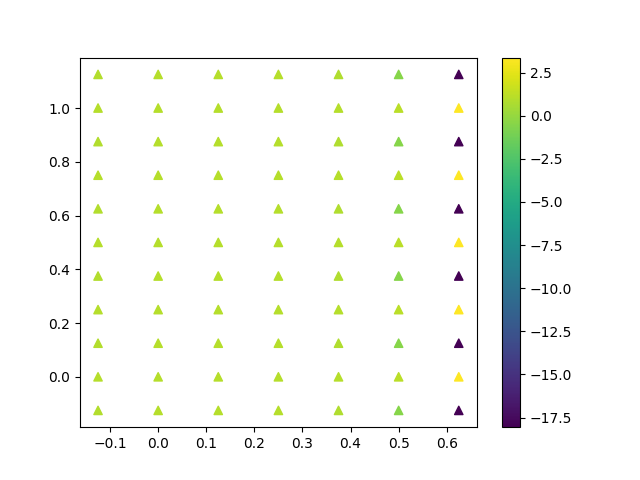

In [10]:
fig = plt.figure()
x0vals,y0vals,c0vals = [], [], []
x1vals,y1vals,c1vals = [], [], []
for dof in mass.mesh.dofs.values():
    if dof.h == mass.h:
        pass
        if False:#(0.5 < dof.x <= 1) and (0 <= dof.y <= 1):
           x1vals.append(dof.x)
           y1vals.append(dof.y)
           c1vals.append(mass.U[dof.ID])
    else:
        pass
        if True:#(0 <= dof.x <= 0.5) and (0 <= dof.y <= 1):
           x0vals.append(dof.x)
           y0vals.append(dof.y)
           c0vals.append(mass.U[dof.ID])

plt.scatter(x1vals,y1vals,c=c1vals,marker='o')
plt.scatter(x0vals,y0vals,c=c0vals,marker='^')
plt.colorbar()
plt.show()

In [18]:
xf  0.5

True

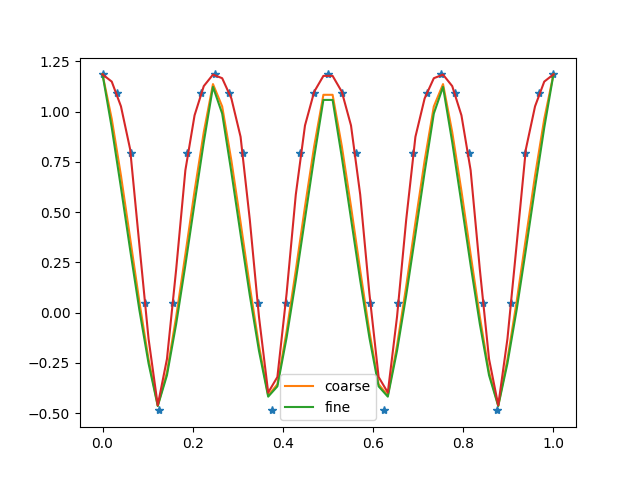

In [19]:
# check that solution is at least matching at interface
fig = plt.figure()
s = mass.sol()
xc, xf = 0.5-1e-8, 0.5+1e-14
ydom = np.linspace(0,1)

sc = [s(xc,y) for y in ydom]
sf = [s(xf,y) for y in ydom]

ynodes = np.linspace(0,1,2*int(1/mass.h)+1)
snodes = [s(0.5,y) for y in ynodes]

true_interface = [s(.5,y) for y in ydom]

plt.plot(ynodes,snodes,'*')
plt.plot(ydom,sc,label='coarse')
plt.plot(ydom,sf,label='fine')
plt.plot(dom,true_interface)
plt.legend()
plt.show()

Text(0.5, 1.0, '213.21384747818374')

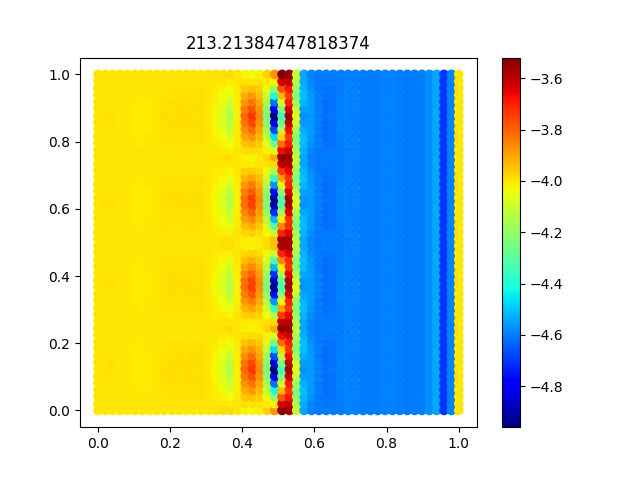

In [20]:
fig = plt.figure()
dom = np.linspace(1e-5,1-1e-5)
X,Y = np.meshgrid(dom,dom)
z = []
for x,y in zip(X.flatten(),Y.flatten()):
    z.append(s(x,y))
Z = np.array(z).reshape(X.shape)
plt.scatter(X.flatten(),Y.flatten(),c=Z.flatten()-5,cmap='jet')#,hatches=['-', '/', '\\', '//'],extend='both')
plt.colorbar()
plt.title(np.linalg.norm(Z-5))

In [19]:
for e in mass.mesh.elements:
    if e.fine:
        print((e.j,e.i),(e.y/2/mass.h)%1 == 0,e.top,(e.x,e.y),sep='\t')

(0, 0)	True	False	(0.5, 0.0)
(1, 0)	True	True	(0.5625, 0.0)
(2, 0)	True	True	(0.625, 0.0)
(3, 0)	True	True	(0.6875, 0.0)
(4, 0)	True	True	(0.75, 0.0)
(5, 0)	True	True	(0.8125, 0.0)
(6, 0)	True	True	(0.875, 0.0)
(7, 0)	True	True	(0.9375, 0.0)
(0, 1)	False	True	(0.5, 0.0625)
(1, 1)	False	True	(0.5625, 0.0625)
(2, 1)	False	True	(0.625, 0.0625)
(3, 1)	False	True	(0.6875, 0.0625)
(4, 1)	False	True	(0.75, 0.0625)
(5, 1)	False	True	(0.8125, 0.0625)
(6, 1)	False	True	(0.875, 0.0625)
(7, 1)	False	True	(0.9375, 0.0625)
(0, 2)	True	False	(0.5, 0.125)
(1, 2)	True	True	(0.5625, 0.125)
(2, 2)	True	True	(0.625, 0.125)
(3, 2)	True	True	(0.6875, 0.125)
(4, 2)	True	True	(0.75, 0.125)
(5, 2)	True	True	(0.8125, 0.125)
(6, 2)	True	True	(0.875, 0.125)
(7, 2)	True	True	(0.9375, 0.125)
(0, 3)	False	True	(0.5, 0.1875)
(1, 3)	False	True	(0.5625, 0.1875)
(2, 3)	False	True	(0.625, 0.1875)
(3, 3)	False	True	(0.6875, 0.1875)
(4, 3)	False	True	(0.75, 0.1875)
(5, 3)	False	True	(0.8125, 0.1875)
(6, 3)	False	True	(0.87

In [6]:
dof_vis = lap.vis_dofs()

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# invent some numbers, turning the x and y arrays into simple
# 2d arrays, which make combining them together easier.
x = np.linspace(-3, 5, 150).reshape(1, -1)
y = np.linspace(-3, 5, 120).reshape(-1, 1)
z = np.cos(x) + np.sin(y)

# we no longer need x and y to be 2 dimensional, so flatten them.
x, y = x.flatten(), y.flatten()

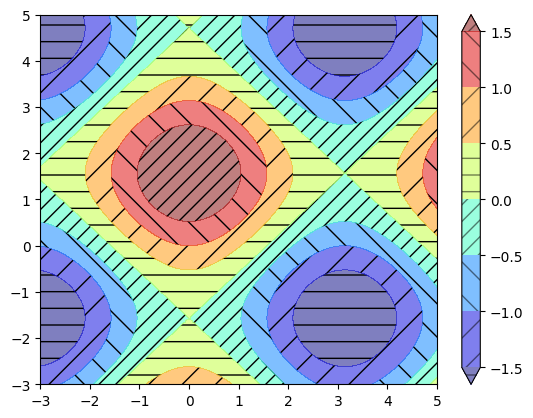

In [25]:
fig1, ax1 = plt.subplots()
cs = ax1.contourf(x, y, z, hatches=['-', '/', '\\', '//'],
                  cmap='jet', extend='both', alpha=0.5)
fig1.colorbar(cs)

In [26]:
x.shape,y.shape,z.shape

((150,), (120,), (120, 150))

In [20]:
dof_vis

NameError: name 'dof_vis' is not defined

In [21]:
ele_vis = mass.vis_elements()

In [22]:
ele_vis

In [7]:
def matvis(m):
    vism = m.copy()
    vism[vism == 0] = np.nan
    plt.matshow(vism)
    plt.show()

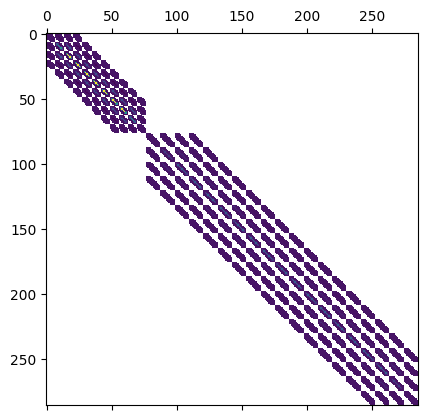

In [8]:
matvis(mass.M)

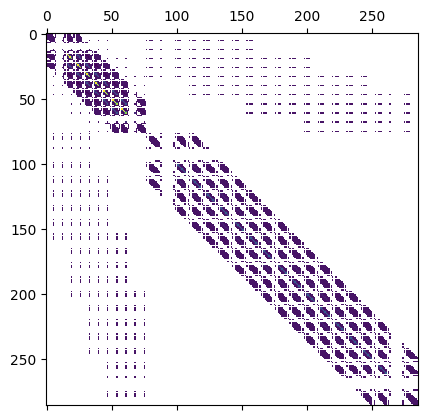

In [10]:
matvis(mass.C.T@mass.M@mass.C)

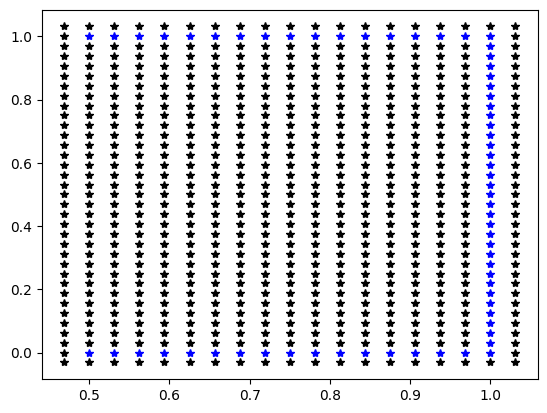

In [15]:
for ind,dof in enumerate(mass.mesh.dofs.values()):
    if dof.h > mass.h:
        pass
    else:
        if mass.dirichlet[ind] == 0.:
            plt.plot(dof.x,dof.y,'k*')
        else:
            plt.plot(dof.x,dof.y,'b*')
plt.show()

In [16]:
np.diag(mass.Id) == 0.

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,

In [15]:
mass.U[np.diag(mass.Id) == 0.]

array([   4.98761719,    5.01536347,    4.98258845,    5.01367831,
          4.6869323 ,    2.54589727,  -26.48193338,    5.        ,
          5.        ,    4.89611063,    4.99039247,    5.00682641,
          4.84467578,    3.78290223,  -10.61392946,    4.86103766,
          4.98714897,    5.00913101,    4.79223844,    3.37201099,
        -15.8851797 ,    4.88661062,    4.98951392,    5.00745065,
          4.83047239,    3.67160658,  -12.04172155,    4.86054632,
          4.98710353,    5.00916329,    4.79150385,    3.36625482,
        -15.95902458,    4.89046388,    4.98987026,    5.00719745,
          4.83623337,    3.71674878,  -11.46260031,    4.85224895,
          4.9863362 ,    5.0097085 ,    4.77909851,    3.26904839,
        -17.20606855,    4.909969  ,    4.99167407,    5.0059158 ,
          4.86539532,    3.94525752,   -8.5311026 ,    5.        ,
          5.        ,    5.28460342,    5.01787894,    5.00738998,
          4.99627013,    5.08272661,    5.64712768,   13.30341

### test next thing

In [16]:
lap.mesh.boundaries

[8, 9, 10, 11, 12, 15, 22, 29, 36, 43, 50, 57, 64, 65, 66, 67, 68]

### playing around

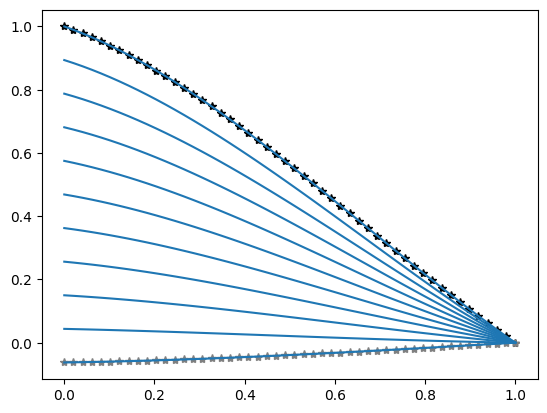

In [21]:
# for non collocated from 0,h 
# want to end up capturing 3h/2,2h

#starting function
fine0 = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3

#ending function
coarse0 = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3
#shift and scale so input is still -h,0
shift0 = lambda x: (x+3*h)/2

result0 = lambda x,alpha: alpha*fine0(x)+(1-alpha)*coarse0(shift0(x))

xdom = np.linspace(0,h)
vals_fine0 = [fine0(x) for x in xdom]
vals_coarse0 = [coarse0(shift0(x)) for x in xdom]

plt.plot(xdom,vals_fine0,'k*')
plt.plot(xdom,vals_coarse0,'*',c='grey')
for alpha in np.linspace(0,1,11):
    vals = [result0(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C0')
plt.show()

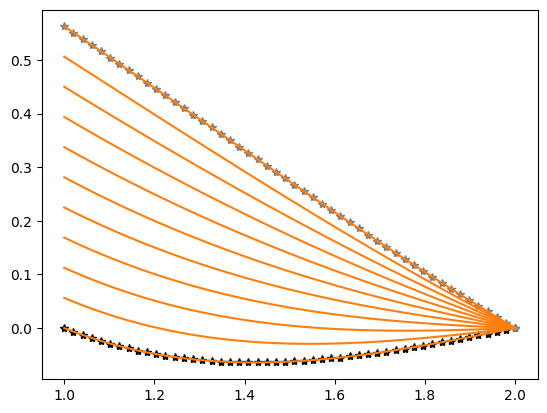

In [22]:
# for collocated from h,2h 
# want to end up capturing h/2,h

#starting function
fine = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3

#ending function
coarse = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(h,2*h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,11):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C1')
plt.show()

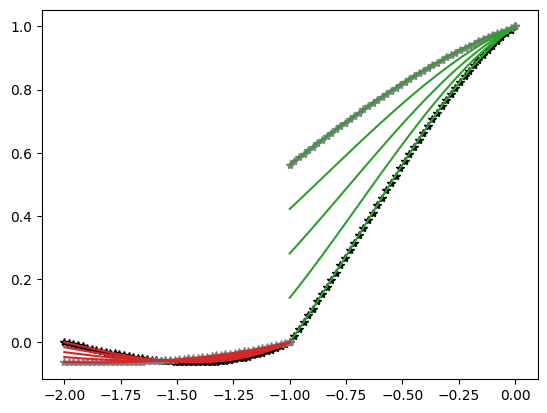

In [23]:
# the other two for testing
# for collocated from -h,0
# want to end up capturing -h/2,0

#starting function
fine = lambda x: -(x+2*h)*(x+h)*(x-h)/2/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-h,0)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C2')

# for collocated from -2h,-h 
# want to end up capturing -3h/2,-h

#starting function
fine = lambda x: (x+3*h)*(x+2*h)*(x+h)/6/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: (x-h)/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-2*h,-h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    plt.plot(xdom,vals,'C3')
plt.show()

1
2
3
4
5


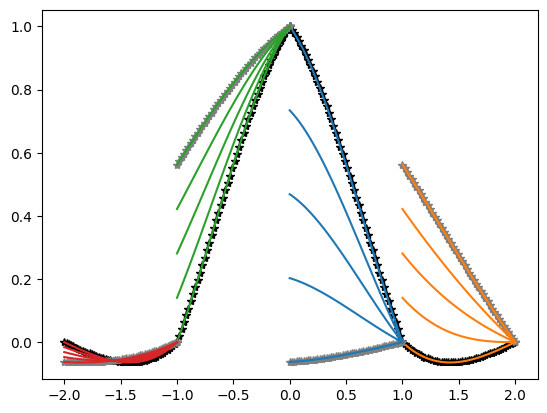

In [30]:
sums = [np.linspace(0,1)*0 for _ in range(7)]

# for collocated from h,2h 
# want to end up capturing h/2,h

#starting function
fine = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3

#ending function
coarse = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(h,2*h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C1')

# for non collocated from -h,0 
# want to end up capturing -2h,-3h/2

#starting function
fine0 = lambda x: (x+h)*(x-h)*(x-2*h)/2/h**3

#ending function
coarse0 = lambda x: -(x-h)*(x-2*h)*(x-3*h)/6/h**3
#shift and scale so input is still -h,0
shift0 = lambda x: (x+3*h)/2

result0 = lambda x,alpha: alpha*fine0(x)+(1-alpha)*coarse0(shift0(x))

xdom = np.linspace(0,h)
vals_fine0 = [fine0(x) for x in xdom]
vals_coarse0 = [coarse0(shift0(x)) for x in xdom]
sums[0] += np.array(vals_coarse0)
sums[-1] += np.array(vals_fine0)

plt.plot(xdom,vals_fine0,'k*')
plt.plot(xdom,vals_coarse0,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result0(x,alpha) for x in xdom]
    print(ind)
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C0')

# the other two for testing
# for collocated from -h,0
# want to end up capturing -h/2,0

#starting function
fine = lambda x: -(x+2*h)*(x+h)*(x-h)/2/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: x/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-h,0)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C2')

# for collocated from -2h,-h 
# want to end up capturing -3h/2,-h

#starting function
fine = lambda x: (x+3*h)*(x+2*h)*(x+h)/6/h**3

#ending function
coarse = lambda x: fine(x)
#shift and scale so input is still -h,0
shift = lambda x: (x-h)/2

result = lambda x,alpha: alpha*fine(x)+(1-alpha)*coarse(shift(x))

xdom = np.linspace(-2*h,-h)
vals_fine = [fine(x) for x in xdom]
vals_coarse = [coarse(shift(x)) for x in xdom]
sums[0] += np.array(vals_coarse)
sums[-1] += np.array(vals_fine)

plt.plot(xdom,vals_fine,'k*')
plt.plot(xdom,vals_coarse,'*',c='grey')
ind = 1
for alpha in np.linspace(0,1,5):
    vals = [result(x,alpha) for x in xdom]
    sums[ind] += np.array(vals)
    ind += 1
    plt.plot(xdom,vals,'C3')
plt.show()

In [13]:
int(-.5)

0

In [2]:
import matplotlib.pyplot as plt

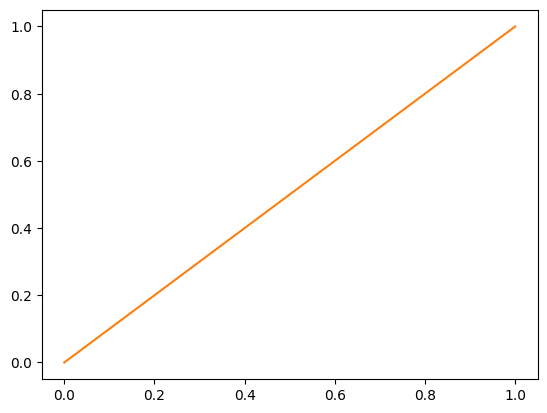

In [5]:
# plt.annotate('',[0,0],xytext=[1,1],arrowprops=dict(arrowstyle='->',connectionstyle='arc'))
plt.plot([0,1],[0,1],'C51')
plt.show()

In [7]:
A =[ 1,2,3,4]

In [8]:
B = A

In [9]:
B.append(5)

In [10]:
A

[1, 2, 3, 4, 5]

In [11]:
import numpy as np

In [16]:
A = np.random.random((5,5))
B = np.zeros_like(A)
B[:] = A[:]
B += 10.
A

array([[0.52770161, 0.33980277, 0.13432371, 0.96416956, 0.26154249],
       [0.36952534, 0.35690088, 0.65255498, 0.99771842, 0.57188765],
       [0.54203099, 0.16347579, 0.02353113, 0.40490378, 0.02118488],
       [0.43568955, 0.21871034, 0.79703994, 0.04542023, 0.46302027],
       [0.3220836 , 0.96305234, 0.66748149, 0.17993101, 0.55107169]])

In [17]:
B

array([[10.52770161, 10.33980277, 10.13432371, 10.96416956, 10.26154249],
       [10.36952534, 10.35690088, 10.65255498, 10.99771842, 10.57188765],
       [10.54203099, 10.16347579, 10.02353113, 10.40490378, 10.02118488],
       [10.43568955, 10.21871034, 10.79703994, 10.04542023, 10.46302027],
       [10.3220836 , 10.96305234, 10.66748149, 10.17993101, 10.55107169]])

In [14]:
A = 5
B = A
B += 4
A

5

In [15]:
A = np.random.random((5,5))
B = A.copy()
B += 10.
A

array([[0.20236194, 0.10876278, 0.61763261, 0.92089851, 0.89514501],
       [0.41883517, 0.4482425 , 0.90804159, 0.28257257, 0.54619491],
       [0.62842465, 0.57812997, 0.603159  , 0.33788762, 0.43445815],
       [0.49657232, 0.37369693, 0.01206002, 0.7657148 , 0.9592489 ],
       [0.37897547, 0.42215476, 0.62169129, 0.40831802, 0.82280759]])

In [18]:
from time import time

import scipy.linalg as sla

In [19]:
import numpy.linalg as la

In [20]:
Nz, Nr, Nt = 10,3,6

height = np.linspace(0,1,Nz+1)
radius = np.linspace(0,.2,Nr+1)
theta = np.linspace(0,2*np.pi,Nt)

In [ ]:
mesh = np.zeros((180,3))
ind = 0

for z in range(Nz):
    for r in range():
        for t in range():
            x = r*np.cos(t)
            y 
            mesh[ind] = [x,y,z]
            ind += 1